<h1><center>The Battle of Neighborhoods</center></h1>

<h1><center>The Data Part</center></h1>

In [1]:
from bs4 import BeautifulSoup as soup
import requests
import json
import numpy as np
import pandas as p

## Rental Offers

### Scraping data

In [2]:
link = "https://www.zumper.com/apartments-for-rent/montreal-qc"
page = requests.get(link).text
content = soup(page,"html")

In [3]:
hoods = content.find("div",{"class":"LocaleHoods_hoods__ph1T7"}).find_all("a")

In [4]:
hood_name = []
hood_url = []
for h in hoods:
    a = h.text
    b = h.get('href')
    hood_name.append(a)
    hood_url.append(b)

In [5]:
base = "https://www.zumper.com"
raw_data = []
for i in range(0,len(hood_url)):
    url = base + hood_url[i] + "/"
    page = requests.get(url).text
    contents = soup(page,"html")
    offers = contents.find_all("div",{"class":"ListItem_topInfoContainer__1qadE"})
    for offer in offers:
        divs = offer.find_all("div")
        raw_data.append([hood_name[i],divs])

raw_data

[['Ahuntsic',
  [<div class="PriceRow_PriceRow__3xrB5"><div class="PriceRow_price__2fDIA">$980</div><div class="PriceRow_info__2Q-x1"><div><div class="PriceRow_btnIconContainer__1WE21"><button class="PriceRow_btnIcon__1Ap_h icon_button_noBorder__332Yo"><span class="PriceRow_iconContainer__5W2eV"><span class="icon_button_icon__2EU_f icon-sprite icon-favorite_light_gray icon-favorite_light_gray-dims"></span></span><span class="ScreenReaderOnly_screenReaderOnly__iyqgu">add to favorite</span></button></div></div></div></div>,
   <div class="PriceRow_price__2fDIA">$980</div>,
   <div class="PriceRow_info__2Q-x1"><div><div class="PriceRow_btnIconContainer__1WE21"><button class="PriceRow_btnIcon__1Ap_h icon_button_noBorder__332Yo"><span class="PriceRow_iconContainer__5W2eV"><span class="icon_button_icon__2EU_f icon-sprite icon-favorite_light_gray icon-favorite_light_gray-dims"></span></span><span class="ScreenReaderOnly_screenReaderOnly__iyqgu">add to favorite</span></button></div></div></div

In [6]:
print(len(raw_data))
for data in raw_data:
    d = data[1]
    l = len(d)
    idx = raw_data.index(data)
    if(l!=13):
        print("row {}: {}".format(idx,l))

589
row 1: 11
row 26: 11
row 27: 11
row 39: 11
row 40: 11
row 41: 11
row 42: 11
row 43: 11
row 44: 11
row 59: 11
row 62: 11
row 66: 11
row 70: 11
row 73: 11
row 85: 11
row 86: 11
row 87: 11
row 88: 11
row 89: 11
row 90: 11
row 91: 11
row 92: 11
row 93: 11
row 98: 15
row 102: 11
row 106: 11
row 126: 11
row 133: 11
row 138: 11
row 146: 11
row 147: 11
row 148: 11
row 182: 11
row 195: 15
row 216: 11
row 256: 11
row 257: 11
row 280: 11
row 282: 11
row 287: 15
row 292: 11
row 294: 11
row 299: 11
row 300: 11
row 317: 11
row 338: 11
row 346: 11
row 347: 11
row 359: 11
row 360: 11
row 361: 11
row 386: 11
row 387: 11
row 388: 11
row 389: 11
row 390: 11
row 393: 11
row 394: 11
row 395: 11
row 396: 11
row 423: 11
row 424: 11
row 425: 11
row 426: 11
row 427: 11
row 428: 11
row 440: 15
row 444: 11
row 496: 11
row 497: 11
row 498: 11
row 499: 11
row 533: 11
row 569: 11
row 570: 11
row 571: 11
row 572: 11
row 573: 11
row 574: 11
row 575: 11
row 576: 11
row 577: 11
row 578: 11
row 580: 11


In [7]:
feats = []
for data in raw_data:
    name = data[0]
    features = data[1]
    if(len(features) == 11):
        price = features[1].text.strip()
        beds = features[6].text.strip()
        baths = features[8].text.strip()
        address = features[9].text[0:-5].strip()
    elif(len(features) == 15):
        price = features[1].text.strip()
        beds = features[9].text.strip()
        baths = features[11].text.strip()
        address = features[13].text[0:-5].strip()
    else:
        price = features[1].text.strip()
        beds = features[7].text.strip()
        baths = features[9].text.strip()
        address = features[11].text[0:-5].strip()
    feats.append([name,address,price,beds,baths])

feats

[['Ahuntsic', '500 Rue Sauvé Est', '$980', 'Studio', '1 bath'],
 ['Ahuntsic', 'ST-LAURENT', '$1,145+', '2 - 3 Beds', '3 floorplans'],
 ['Ahuntsic', '10477 Place Prieur', '$1,050', '2 Beds', '1 bath'],
 ['Ahuntsic', '10479 Place Prieur', '$2,250', '4 Beds', '1 bath'],
 ['Ahuntsic', '9860 Rue Papineau #21', '$1,150', '4 Beds', '1 bath'],
 ['Ahuntsic', '9860 Rue Papineau #2', '$675', '3 Beds', '1 bath'],
 ['Ahuntsic', 'Boul Henri-Bourassa E', '$925', '2 Beds', '1 bath'],
 ['Ahuntsic', '500 Rue Sauvé Est', '$1,350', '1 Bed', '1 bath'],
 ['Ahuntsic', '10250 Avenue de Lorimier', '$760', '1 Bed', '1 bath'],
 ['Bas-Anjou', '5568 Rue Hippolyte Lanctôt', '$2,400', '3 Beds', '1 bath'],
 ['Beaurivage', '4035 Rue Hochelaga', '$730', '2 Beds', '1 bath'],
 ['Beaurivage', '2020 Avenue Valois', '$1,850', '3 Beds', '1 bath'],
 ['Beaurivage', '3950 Rue Lacordaire', '$1,400', '2 Beds', '1 bath'],
 ['Beaurivage', '3560 Rue Hochelaga #1', '$550', '1 Bed', '1 bath'],
 ['Beaurivage', '12020 Rue Bellerive', '$

In [8]:
addresses = p.DataFrame(feats)
addresses.columns = ['Neighborhood','Address','Price','Beds','Bathrooms']

In [11]:
addresses.drop(addresses[addresses.duplicated()].index,axis=0) 

,Neighborhood,Address,Price,Beds,Bathrooms
0,Ahuntsic,500 Rue Sauvé Est,$980,Studio,1 bath
1,Ahuntsic,ST-LAURENT,"$1,145+",2 - 3 Beds,3 floorplans
2,Ahuntsic,10477 Place Prieur,"$1,050",2 Beds,1 bath
3,Ahuntsic,10479 Place Prieur,"$2,250",4 Beds,1 bath
4,Ahuntsic,9860 Rue Papineau #21,"$1,150",4 Beds,1 bath
5,Ahuntsic,9860 Rue Papineau #2,$675,3 Beds,1 bath
6,Ahuntsic,Boul Henri-Bourassa E,$925,2 Beds,1 bath
7,Ahuntsic,500 Rue Sauvé Est,"$1,350",1 Bed,1 bath
8,Ahuntsic,10250 Avenue de Lorimier,$760,1 Bed,1 bath
9,Bas-Anjou,5568 Rue Hippolyte Lanctôt,"$2,400",3 Beds,1 bath


In [15]:
x = addresses[addresses.duplicated('Address') ==True].index
addresses = addresses.drop(x,0)

In [16]:
addresses = addresses.reset_index(drop=True)

### Geocoding the offers

In [17]:
with open('../Capstone/herecreds.json') as file:
    f = json.load(file)
    appid = f.get('app_id')
    code = f.get('app_code')
resps = []
for addr in addresses['Address']:
    address = addr + ', Montreal, QC'
    url = "https://geocoder.api.here.com/6.2/geocode.json?app_id={}&app_code={}&searchtext={}".format(
        appid,
        code,
        addr
    )
    resp = requests.get(url).json()
    resps.append(resp)


In [25]:
empty = []
for response in resps:
    views = response["Response"]["View"]
    idx = resps.index(response)
    if(len(views) < 1):
        empty.append(resps.index(response))
        #print(idx)

In [26]:
backup = addresses.copy()
for i in range(len(resps),0,-1):
    if(i in empty):
        resps.pop(i)

addresses = addresses.drop(empty,0)
addresses = addresses.reset_index(drop=True)

In [27]:
row = []
for r in resps:
    loc = r['Response']['View'][0]['Result'][0]['Location']
    pos = loc["DisplayPosition"]
    lat = pos["Latitude"]
    lng = pos["Longitude"]
    address = loc["Address"]
    label = address.get("Label")
    district = address.get("District")
    row.append([district,label,lat,lng])
row

[['Ahuntsic',
  '500 Rue Sauvé E, Montréal, QC H2C, Canada',
  45.5516125,
  -73.6552759],
 [None, 'St Laurent, MB, Canada', 50.4182, -97.94066],
 ['Ahuntsic',
  '10477 Place Prieur, Montréal, QC H3L 3L3, Canada',
  45.54125,
  -73.67226],
 ['Ahuntsic',
  '10479 Place Prieur, Montréal, QC H3L 3L3, Canada',
  45.54125,
  -73.67226],
 ['St-Michel',
  '9859 Avenue Papineau, Montréal, QC H2B 1Z9, Canada',
  45.5664243,
  -73.6488021],
 ['St-Michel',
  '9859 Avenue Papineau, Montréal, QC H2B 1Z9, Canada',
  45.5664243,
  -73.6488021],
 ['Rivière-des-Prairies-Point-Trembles',
  'Boulevard Henri-Bourassa E, Montréal, QC H1E, Canada',
  45.62981,
  -73.57515],
 ['St-Michel',
  '10250 Avenue de Lorimier, Montréal, QC H2B 2H9, Canada',
  45.57063,
  -73.65051],
 ['Anjou',
  '5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5G7, Canada',
  45.60019,
  -73.54257],
 ['Mercier-Hochelaga-Maisonneuve',
  '4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada',
  45.55224,
  -73.54878],
 ['Mercier-Hochelaga-Mai

In [28]:
addr = p.DataFrame(row)
addresses.shape[0] - addr.shape[0]

0

In [32]:
addr.columns = ['Neighborhood','Address','Latitude','Longitude']

### Cleaning the offers dataset

In [33]:
addr[addr['Neighborhood'].isna() == True]

,Neighborhood,Address,Latitude,Longitude
1,None,"St Laurent, MB, Canada",50.418200,-97.940660
29,None,"5 Place de la Belle-Rive, Laval, QC H7V 1B3, C...",45.538300,-73.724690
30,None,"Impasse du Saphir, Cantley, QC J8V, Canada",45.554350,-75.703220
32,None,"Boulevard de la Côte-Vertu, Dorval, QC H4Y, Ca...",45.476480,-73.730250
48,None,"Victoria, BC, Canada",48.428550,-123.364450
54,None,"Résidence les Jardins, 56800 Ploërmel, France",47.939580,-2.402260
63,None,"4005 Rue Papineau, Lac-Mégantic, QC G6B, Canada",45.586203,-70.890475
64,None,"4105 Rue Papineau, Trois-Rivières, QC G8Y 1P4,...",46.359990,-72.581280
78,None,"LaSalle, ON, Canada",42.246250,-83.060890
109,None,"Rue du Sommet, Ste-Marguerite-du-Lac-Masson, Q...",46.030710,-74.059880


In [34]:
addr.loc[353,'Neighborhood'] = 'Ville-Marie'

In [35]:
addresses = addresses.reset_index(drop=True)
addr = addr.reset_index(drop=True)
x = addr[addr['Neighborhood'].isna() == True].index
addr.drop(x,0)
addresses.drop(x,0)
addresses = addresses.reset_index(drop=True)
addr = addr.reset_index(drop=True)

In [38]:
addr.shape[0] - addresses.shape[0]

0

In [43]:
addr = p.concat([addr,addresses[['Price','Beds','Bathrooms']]],axis=1)

In [44]:
addr

,Neighborhood,Address,Latitude,Longitude,Price,Beds,Bathrooms
0,Ahuntsic,"500 Rue Sauvé E, Montréal, QC H2C, Canada",45.551612,-73.655276,$980,Studio,1 bath
1,None,"St Laurent, MB, Canada",50.418200,-97.940660,"$1,145+",2 - 3 Beds,3 floorplans
2,Ahuntsic,"10477 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$1,050",2 Beds,1 bath
3,Ahuntsic,"10479 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$2,250",4 Beds,1 bath
4,St-Michel,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,"$1,150",4 Beds,1 bath
5,St-Michel,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,$675,3 Beds,1 bath
6,Rivière-des-Prairies-Point-Trembles,"Boulevard Henri-Bourassa E, Montréal, QC H1E, ...",45.629810,-73.575150,$925,2 Beds,1 bath
7,St-Michel,"10250 Avenue de Lorimier, Montréal, QC H2B 2H9...",45.570630,-73.650510,$760,1 Bed,1 bath
8,Anjou,"5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5...",45.600190,-73.542570,"$2,400",3 Beds,1 bath
9,Mercier-Hochelaga-Maisonneuve,"4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada",45.552240,-73.548780,$730,2 Beds,1 bath


In [46]:
addresses = addresses.reset_index(drop=True)
addr = addr.reset_index(drop=True)
x = addr[addr['Neighborhood'].isna() == True].index
addr = addr.drop(x,0)
addresses = addresses.drop(x,0)
addresses = addresses.reset_index(drop=True)
addr = addr.reset_index(drop=True)
addr

,Neighborhood,Address,Latitude,Longitude,Price,Beds,Bathrooms
0,Ahuntsic,"500 Rue Sauvé E, Montréal, QC H2C, Canada",45.551612,-73.655276,$980,Studio,1 bath
1,Ahuntsic,"10477 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$1,050",2 Beds,1 bath
2,Ahuntsic,"10479 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$2,250",4 Beds,1 bath
3,St-Michel,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,"$1,150",4 Beds,1 bath
4,St-Michel,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,$675,3 Beds,1 bath
5,Rivière-des-Prairies-Point-Trembles,"Boulevard Henri-Bourassa E, Montréal, QC H1E, ...",45.629810,-73.575150,$925,2 Beds,1 bath
6,St-Michel,"10250 Avenue de Lorimier, Montréal, QC H2B 2H9...",45.570630,-73.650510,$760,1 Bed,1 bath
7,Anjou,"5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5...",45.600190,-73.542570,"$2,400",3 Beds,1 bath
8,Mercier-Hochelaga-Maisonneuve,"4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada",45.552240,-73.548780,$730,2 Beds,1 bath
9,Mercier-Hochelaga-Maisonneuve,"2020 Avenue Valois, Montréal, QC H1W 3M5, Canada",45.547110,-73.544290,"$1,850",3 Beds,1 bath


In [47]:
addr['Neighborhood'].value_counts()

Le Plateau-Mont-Royal                  34
Notre-Dame-de-Grâce                    27
Côte-des-Neiges-Notre-Dame-de-Grâce    22
Le Sud-Ouest                           21
Rosemont-la Petite-Patrie              17
Milton-Parc                            17
Côte-des-Neiges                        17
Villeray-St-Michel-Parc-Extension      14
Verdun                                 13
Outremont                              13
St-Laurent                             12
Lachine                                11
La Salle                                8
Ahuntsic                                8
Vieux-Montréal                          7
Le Village                              7
Mercier-Hochelaga-Maisonneuve           7
Centre-Ville                            6
Rosemont                                6
Montréal-Nord                           6
Pointe-aux-Trembles                     6
Ville-Marie                             6
St-Michel                               6
Plateau Mont-Royal                

In [48]:
x = addr[addr['Neighborhood'] == 'Jonquière'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [49]:
x = addr[addr['Neighborhood'] == 'Norgate'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [50]:
x = addr[addr['Neighborhood'] == 'Nepean'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [51]:
x = addr[addr['Neighborhood'] == 'Asuncion'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [52]:
x = addr[addr['Neighborhood'] == 'Pakenham'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [53]:
x = addr[addr['Neighborhood'] == 'Элеватор'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [54]:
x = addr[addr['Neighborhood'] == 'Mill Park'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [55]:
x = addr[addr['Neighborhood'] == 'Neuville'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [56]:
x = addr[addr['Neighborhood'] == 'Libertad'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [57]:
x = addr[addr['Neighborhood'] == 'Kensington-Cedar Cottage'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [59]:
print(len(addr['Neighborhood'].unique()))
addr['Neighborhood'].value_counts()

40


Le Plateau-Mont-Royal                  34
Notre-Dame-de-Grâce                    27
Côte-des-Neiges-Notre-Dame-de-Grâce    22
Le Sud-Ouest                           21
Côte-des-Neiges                        17
Milton-Parc                            17
Rosemont-la Petite-Patrie              17
Villeray-St-Michel-Parc-Extension      14
Verdun                                 13
Outremont                              13
St-Laurent                             12
Lachine                                11
La Salle                                8
Ahuntsic                                8
Le Village                              7
Vieux-Montréal                          7
Mercier-Hochelaga-Maisonneuve           7
Ville-Marie                             6
Rosemont                                6
Pointe-aux-Trembles                     6
Montréal-Nord                           6
Centre-Ville                            6
St-Michel                               6
Plateau Mont-Royal                

In [60]:
x = addr[addr['Neighborhood'] == 'Côte-des-Neiges'].index
addr.loc[x,'Neighborhood'] = 'Côte-des-Neiges-Notre-Dame-de-Grâce'
addr = addr.reset_index(drop=True)

In [61]:
x = addr[addr['Neighborhood'] == 'Pointe-aux-Trembles'].index
addr.loc[x,'Neighborhood'] = 'Rivière-des-Prairies-Point-Trembles'
addr = addr.reset_index(drop=True)

In [62]:
x = addr[addr['Neighborhood'] == 'Rivière-des-Prairies-Point-Trembles'].index
addr.loc[x,'Neighborhood'] = 'Pointe-aux-Trembles'
addr = addr.reset_index(drop=True)

In [63]:
x = addr[addr['Neighborhood'] == 'Villa Saint-Jean'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [64]:
x = addr[addr['Neighborhood'] == 'Plateau Mont-Royal'].index
addr.loc[x,'Neighborhood'] = 'Le Plateau-Mont-Royal'
addr = addr.reset_index(drop=True)

In [65]:
x = addr[addr['Neighborhood'] == 'Centre-Ville'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [66]:
x = addr[addr['Neighborhood'] == 'Rosemont'].index
addr.loc[x,'Neighborhood'] = 'Rosemont-la Petite-Patrie'
addr = addr.reset_index(drop=True)

In [70]:
x = []
a = addr[addr['Neighborhood'] == 'Le Mistral'].index
x.append(a[0])
a = addr[addr['Neighborhood'] == 'Casgrain'].index
x.append(a[0])
a = addr[addr['Neighborhood'] == 'Arbora'].index
x.append(a[0])
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [71]:
x = addr[addr['Neighborhood'] == 'Le Village'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [72]:
x = addr[addr['Neighborhood'] == 'Vieux-Montréal'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [73]:
x = addr[addr['Neighborhood'] == 'Milton-Parc'].index
addr.loc[x,'Neighborhood'] = 'Le Plateau-Mont-Royal'
addr = addr.reset_index(drop=True)

In [74]:
addr['Neighborhood'].value_counts()

Le Plateau-Mont-Royal                  56
Côte-des-Neiges-Notre-Dame-de-Grâce    39
Notre-Dame-de-Grâce                    27
Ville-Marie                            26
Rosemont-la Petite-Patrie              23
Le Sud-Ouest                           21
Villeray-St-Michel-Parc-Extension      14
Verdun                                 13
Outremont                              13
St-Laurent                             12
Lachine                                11
La Salle                                8
Ahuntsic                                8
Mercier-Hochelaga-Maisonneuve           7
Pointe-aux-Trembles                     7
St-Michel                               6
Montréal-Nord                           6
Cité du Multimédia                      4
Quartier des Riverains                  2
Cité du Commerce Électronique           2
Quartier des Spectacles                 2
Pierrefonds                             1
Quartier International                  1
St-Léonard                        

In [75]:
x = addr[addr['Neighborhood'] == 'Ahuntsic'].index
addr.loc[x,'Neighborhood'] = 'Ahuntsic-Cartierville'
addr = addr.reset_index(drop=True)

In [76]:
x = addr[addr['Neighborhood'] == 'St-Michel'].index
addr.loc[x,'Neighborhood'] = 'Villeray-St-Michel-Parc-Extension'
addr = addr.reset_index(drop=True)

In [78]:
a = addr['Neighborhood'].unique()
len(a)

26

In [81]:
x = addr[addr['Neighborhood'] == 'La Fontaine'].index
addr = addr.drop(x,0)
addr = addr.reset_index(drop=True)

In [82]:
x = addr[addr['Neighborhood'] == 'Cité du Multimédia'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [83]:
x = addr[addr['Neighborhood'] == 'Cité du Commerce Électronique'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [85]:
x = addr[addr['Neighborhood'] == 'Quartier des Spectacles'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [86]:
a = addr['Neighborhood'].unique()
len(a)

22

In [87]:
addr['Neighborhood'].value_counts()


Le Plateau-Mont-Royal                  56
Côte-des-Neiges-Notre-Dame-de-Grâce    39
Ville-Marie                            34
Notre-Dame-de-Grâce                    27
Rosemont-la Petite-Patrie              23
Le Sud-Ouest                           21
Villeray-St-Michel-Parc-Extension      20
Verdun                                 13
Outremont                              13
St-Laurent                             12
Lachine                                11
Ahuntsic-Cartierville                   9
La Salle                                8
Pointe-aux-Trembles                     7
Mercier-Hochelaga-Maisonneuve           7
Montréal-Nord                           6
Quartier des Riverains                  2
Quartier International                  1
Pierrefonds                             1
St-Léonard                              1
Anjou                                   1
Vieux-Port                              1
Name: Neighborhood, dtype: int64

In [88]:
x = addr[addr['Neighborhood'] == 'Quartier International'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [89]:
x = addr[addr['Neighborhood'] == 'Quartier des Riverains'].index
addr.loc[x,'Neighborhood'] = 'Mercier-Hochelaga-Maisonneuve'
addr = addr.reset_index(drop=True)

In [90]:
x = addr[addr['Neighborhood'] == 'Vieux-Port'].index
addr.loc[x,'Neighborhood'] = 'Ville-Marie'
addr = addr.reset_index(drop=True)

In [91]:
a = addr['Neighborhood'].unique()
len(a)
addr['Neighborhood'].value_counts()

Le Plateau-Mont-Royal                  56
Côte-des-Neiges-Notre-Dame-de-Grâce    39
Ville-Marie                            36
Notre-Dame-de-Grâce                    27
Rosemont-la Petite-Patrie              23
Le Sud-Ouest                           21
Villeray-St-Michel-Parc-Extension      20
Outremont                              13
Verdun                                 13
St-Laurent                             12
Lachine                                11
Mercier-Hochelaga-Maisonneuve           9
Ahuntsic-Cartierville                   9
La Salle                                8
Pointe-aux-Trembles                     7
Montréal-Nord                           6
Anjou                                   1
Pierrefonds                             1
St-Léonard                              1
Name: Neighborhood, dtype: int64

In [92]:
x = addr[addr['Neighborhood'] == 'Notre-Dame-de-Grâce'].index
addr.loc[x,'Neighborhood'] = 'Côte-des-Neiges-Notre-Dame-de-Grâce'
addr = addr.reset_index(drop=True)

In [93]:
addr

,Neighborhood,Address,Latitude,Longitude,Price,Beds,Bathrooms
0,Ahuntsic-Cartierville,"500 Rue Sauvé E, Montréal, QC H2C, Canada",45.551612,-73.655276,$980,Studio,1 bath
1,Ahuntsic-Cartierville,"10477 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$1,050",2 Beds,1 bath
2,Ahuntsic-Cartierville,"10479 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,"$2,250",4 Beds,1 bath
3,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,"$1,150",4 Beds,1 bath
4,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,$675,3 Beds,1 bath
5,Pointe-aux-Trembles,"Boulevard Henri-Bourassa E, Montréal, QC H1E, ...",45.629810,-73.575150,$925,2 Beds,1 bath
6,Villeray-St-Michel-Parc-Extension,"10250 Avenue de Lorimier, Montréal, QC H2B 2H9...",45.570630,-73.650510,$760,1 Bed,1 bath
7,Anjou,"5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5...",45.600190,-73.542570,"$2,400",3 Beds,1 bath
8,Mercier-Hochelaga-Maisonneuve,"4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada",45.552240,-73.548780,$730,2 Beds,1 bath
9,Mercier-Hochelaga-Maisonneuve,"2020 Avenue Valois, Montréal, QC H1W 3M5, Canada",45.547110,-73.544290,"$1,850",3 Beds,1 bath


In [94]:
addr.to_csv('./addresses.csv')

### Geocoding universities

In [95]:
schools = p.read_csv('./schools.csv')

In [99]:
with open('./herecreds.json','r') as file:
    f = json.load(file)
    appid = f.get('app_id')
    appcode = f.get('app_code')
    
resps = []
for i in range(0,schools.shape[0]):
    url = "https://geocoder.api.here.com/6.2/geocode.json?app_id={}&app_code={}&searchtext={}".format(
        appid,
        code,
        schools.loc[i,"Address"]
    )
    resp = requests.get(url).json()
    resps.append(resp)
resps[0]    

{'Response': {'MetaInfo': {'Timestamp': '2019-05-08T06:06:11.747+0000'},
  'View': [{'_type': 'SearchResultsViewType',
    'ViewId': 0,
    'Result': [{'Relevance': 1.0,
      'MatchLevel': 'houseNumber',
      'MatchQuality': {'Street': [1.0], 'HouseNumber': 1.0},
      'MatchType': 'interpolated',
      'Location': {'LocationId': 'NT_624yCywDHgp8KpxRwXfFdC_4QTN',
       'LocationType': 'point',
       'DisplayPosition': {'Latitude': 45.5037769, 'Longitude': -73.5748727},
       'NavigationPosition': [{'Latitude': 45.5036619,
         'Longitude': -73.5747721}],
       'MapView': {'TopLeft': {'Latitude': 45.5049011,
         'Longitude': -73.5764767},
        'BottomRight': {'Latitude': 45.5026528, 'Longitude': -73.5732688}},
       'Address': {'Label': '845 Rue Sherbrooke O, Montréal, QC H3A 0G4, Canada',
        'Country': 'CAN',
        'State': 'QC',
        'County': 'Montréal',
        'City': 'Montréal',
        'District': 'Centre-Ville',
        'Street': 'Rue Sherbrooke O',


In [102]:
rows = []
for r in resps:
    loc = r['Response']['View'][0]['Result'][0]["Location"].get("DisplayPosition")
    lat = loc.get("Latitude")
    lng = loc.get("Longitude")
    rows.append([lat,lng])

df = p.DataFrame(rows,columns=['Latitude','Longitude'])

In [103]:
schools = p.concat([schools,df],axis=1)
schools

,School,Address,Latitude,Longitude
0,McGill University,845 Rue Sherbrooke Ouest,45.503777,-73.574873
1,University of Montreal,2900 Boulevard Edouard-Montpetit,45.503188,-73.618715
2,Concordia University,1455 Boulevard de Maisonneuve,45.497210,-73.578620
3,Shool of Higher Technology,1100 rue Notre-Dame West,45.435140,-73.673750
4,Montreal College of Information Technology,1255 Boulevard Robert-Bourassa Suite 501,45.503140,-73.569220
5,University of Quebec in Montreal,405 Rue Sainte-Catherine Est,45.513290,-73.561070
6,HEC Montreal,3000 Chemin de la Côte-Sainte-Catherine,45.503800,-73.622340


In [3]:
def dist(a,b,c,d):
    x1 = a-b
    y1 = c-d
    x2 = np.square(x1)
    y2 = np.square(x2)
    z = np.sqrt(x2+y2)
    return z

In [ ]:
'''
1/ Calculer les distances

2/ Découvrir les catégories

3/ Trier et agréger

4/ Mapper
'''

In [2]:
locations = p.read_csv('./addresses.csv')
schools = p.read_csv('./schools.csv')

In [10]:
locations = locations.drop('Unnamed: 0',1)

In [14]:
with open('./herecreds.json') as file:
    f = json.load(file)
    appid = f.get("app_id")
    code = f.get("app_code")

reqs = []    
for row in schools["Address"]:
    url = "https://geocoder.api.here.com/6.2/geocode.json?app_id={}&app_code={}&searchtext={}".format(
        appid,
        code,
        row
    )
    page = requests.get(url).json()
    reqs.append(page)
    
len(reqs)

7

In [16]:
locs = []
for r in reqs:
    loc = r['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']
    lat = loc.get('Latitude')
    lng = loc.get('Longitude')
    locs.append([lat,lng])

In [17]:
positions = p.DataFrame(locs,columns=['Latitude','Longitude'])
schools = p.concat([schools,positions],axis=1)
schools

,School,Address,Latitude,Longitude
0,McGill University,845 Rue Sherbrooke Ouest,45.503777,-73.574873
1,University of Montreal,2900 Boulevard Edouard-Montpetit,45.503188,-73.618715
2,Concordia University,1455 Boulevard de Maisonneuve,45.497210,-73.578620
3,Shool of Higher Technology,1100 rue Notre-Dame West,45.435140,-73.673750
4,Montreal College of Information Technology,1255 Boulevard Robert-Bourassa Suite 501,45.503140,-73.569220
5,University of Quebec in Montreal,405 Rue Sainte-Catherine Est,45.513290,-73.561070
6,HEC Montreal,3000 Chemin de la Côte-Sainte-Catherine,45.503800,-73.622340


### Computing distance from universities

In [18]:
rows = []
for i in range(0,locations.shape[0]):
    xlat = locations.loc[i,"Latitude"]
    xlng = locations.loc[i,"Longitude"]
    row = []
    for j in range(0,schools.shape[0]):
        ylat = schools.loc[j,"Latitude"]
        ylng = schools.loc[j,"Longitude"]
        d = dist(xlat,ylat,xlng,ylng)
        row.append(d)
    rows.append(row)

rows

[[0.047890298504337535,
  0.04848164424521454,
  0.054482946211285695,
  0.11725986252551743,
  0.048529411677122256,
  0.038350630155830845,
  0.04786711933034543],
 [0.03749940125597031,
  0.03808996140171019,
  0.04408268757728437,
  0.1067056917851073,
  0.03813766490907066,
  0.027970926892029267,
  0.03747625265768295],
 [0.03749940125597031,
  0.03808996140171019,
  0.04408268757728437,
  0.1067056917851073,
  0.03813766490907066,
  0.027970926892029267,
  0.03747625265768295],
 [0.06277021563732695,
  0.06336301184412461,
  0.06937989159692458,
  0.1324108462740207,
  0.06341089710402056,
  0.053209252942649665,
  0.06274697991833522],
 [0.06277021563732695,
  0.06336301184412461,
  0.06937989159692458,
  0.1324108462740207,
  0.06341089710402056,
  0.053209252942649665,
  0.06274697991833522],
 [0.12703013274721203,
  0.12763344669777907,
  0.13376065732948775,
  0.19832434723834813,
  0.12768218433236378,
  0.11730832406956439,
  0.12700648605707632],
 [0.06700232796439026,
 

In [21]:
mean_dist = []
for row in rows:
    mean = p.Series(row).mean()
    mean_dist.append(mean)

In [23]:
locations['Price'].value_counts()

$1,900     9
$1,200     8
$800       7
$1,500     7
$2,000     7
$2,500     7
$900       7
$1,450     7
$2,300     6
$1,750     6
$850       6
$875       6
$2,100     6
$1,700     6
$1,600     6
$1,650     5
$1,050     4
$1,400     4
$950       4
$2,200     4
$1,850     4
$1,550     4
$1,100     4
$1,300     4
$2,800     4
$1,800     3
$1,175     3
$3,200     3
$1,250     3
$1,150     3
          ..
$1,195     1
$1,300+    1
$3,100     1
$4,200     1
$580       1
$2,750     1
$1,999     1
$595       1
$1,690     1
$655       1
$1,248     1
$1,200+    1
$2,600     1
$1,045+    1
$5,950     1
$1,320     1
$890       1
$1,380     1
$550       1
$1,630     1
$714       1
$694       1
$4,700     1
$4,100     1
$1,160     1
$1,130+    1
$3,280     1
$700       1
$675       1
$975       1
Name: Price, Length: 147, dtype: int64

In [41]:
s=[]
for l in locations['Price']:
    idx = locations['Price'].index
    if((l[-1] != '0') & (l[-1] != '5') & (l[-1] != '9') & (l[-1] != '4') & (l[-1] != '6') & (l[-1] != '8') & (l[-1] != '2')):
        l = l[0:-1]
    l = l.replace(',','')
    l = l.replace("$",'')
    s.append(l)

s_price = p.Series(s)
end = p.concat([s_price,locations[["Beds","Bathrooms"]]],axis=1)
end.columns = ['Price','Bedrooms','Bathrooms']

In [44]:
m_dist = p.Series(mean_dist)
dataset = p.concat([locations[['Neighborhood','Address','Latitude','Longitude']],m_dist,end['Price']],axis=1)
dataset.columns = ['Neighborhood','Address','Latitude','Longitude','AvgDist','Price']
dataset

,Neighborhood,Address,Latitude,Longitude,AvgDist,Price
0,Ahuntsic-Cartierville,"500 Rue Sauvé E, Montréal, QC H2C, Canada",45.551612,-73.655276,0.057552,980
1,Ahuntsic-Cartierville,"10477 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,0.047138,1050
2,Ahuntsic-Cartierville,"10479 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,0.047138,2250
3,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,0.072470,1150
4,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,0.072470,675
5,Pointe-aux-Trembles,"Boulevard Henri-Bourassa E, Montréal, QC H1E, ...",45.629810,-73.575150,0.136964,925
6,Villeray-St-Michel-Parc-Extension,"10250 Avenue de Lorimier, Montréal, QC H2B 2H9...",45.570630,-73.650510,0.076714,760
7,Anjou,"5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5...",45.600190,-73.542570,0.106671,2400
8,Mercier-Hochelaga-Maisonneuve,"4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada",45.552240,-73.548780,0.058183,730
9,Mercier-Hochelaga-Maisonneuve,"2020 Avenue Valois, Montréal, QC H1W 3M5, Canada",45.547110,-73.544290,0.053025,1850


In [45]:
dataset.to_csv('data1.csv')

## Venues dataset

### Exploring venues nearby offers

In [46]:
with open('./creds.json') as file:
    f = json.load(file)
    cid = f.get('client_id')
    sec = f.get('client_secret')
    ver = f.get('version')
    lim = f.get('limit')

In [48]:
rad = 500
resps = []
for i in range(0,dataset.shape[0]):
    lat = dataset.loc[i,'Latitude']
    lng = dataset.loc[i,'Longitude']
    foursquare = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        cid,
        sec,
        ver,
        lat,
        lng,
        rad,
        lim
    )
    resp = requests.get(foursquare).json()
    resps.append(resp)

In [57]:
table = []
for resp in resps:
    idx = resps.index(resp)
    nbh = dataset.loc[idx,'Neighborhood']
    items = resp['response']['groups'][0]['items']
    for item in items:
        venue = item['venue']
        name = venue['name']
        loc = venue["location"]
        addr = loc.get("address")
        lat = loc.get('lat')
        lng = loc.get('lng')
        cat = venue['categories'][0]['name']
        table.append([nbh,name,addr,lat,lng,cat])

In [58]:
tab = p.DataFrame(table)
tab.columns = ['Neighborhood','Venue','Address','Latitude','Longitude','Category']

In [59]:
tab

,Neighborhood,Venue,Address,Latitude,Longitude,Category
0,Ahuntsic-Cartierville,Martini Pizza,9481 rue Lajeunesse,45.550091,-73.651292,Pizza Place
1,Ahuntsic-Cartierville,Pharmacie Jean Coutu,"9465, rue Lajeunesse",45.550213,-73.650750,Pharmacy
2,Ahuntsic-Cartierville,STM Station Sauvé,Station Sauvé,45.550872,-73.655949,Metro Station
3,Ahuntsic-Cartierville,Parc Auteuil,Rue De Port-Royal Est,45.548836,-73.656777,Baseball Field
4,Ahuntsic-Cartierville,Couche-Tard,800 RUE Sauvé E,45.554645,-73.653437,Convenience Store
5,Ahuntsic-Cartierville,Le Brûloir,343 Fleury Ouest,45.543601,-73.667883,Café
6,Ahuntsic-Cartierville,SAQ Sélection,"450, boul. Henri-Bourassa Ouest",45.544110,-73.674498,Liquor Store
7,Ahuntsic-Cartierville,L'Oeuforie Matinale,391 Henri-Bourassa Ouest,45.544712,-73.674450,Breakfast Spot
8,Ahuntsic-Cartierville,L'Artizan,414 Fleury Ouest,45.542566,-73.668445,Pizza Place
9,Ahuntsic-Cartierville,AMT Gare de Bois-de-Boulogne,"1906, rue Saint-Réal",45.540292,-73.676976,Train Station


In [60]:
tab['Category'].value_counts()

Café                             561
Bakery                           297
Coffee Shop                      276
Restaurant                       270
Pizza Place                      233
French Restaurant                232
Pharmacy                         188
Grocery Store                    168
Park                             166
Italian Restaurant               163
Sandwich Place                   162
Breakfast Spot                   155
Bar                              148
Hotel                            137
Fast Food Restaurant             130
Sushi Restaurant                 118
Vietnamese Restaurant            103
Tea Room                         103
Liquor Store                      89
Vegetarian / Vegan Restaurant     86
Indian Restaurant                 85
Gym                               84
Ice Cream Shop                    84
Gym / Fitness Center              82
Greek Restaurant                  80
Gastropub                         79
Bookstore                         78
D

### Categories aggregation

In [63]:
import re

In [67]:
exp = r"^(Sandwich|Pizza|Burger|Diner|Taco|BBQ|Fish & Chips|Soup)|^.*?\bRestaurant$"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Restaurant'

In [68]:
tab['Category'].value_counts()

Restaurant                2695
Café                       561
Bakery                     297
Coffee Shop                276
Pharmacy                   188
Grocery Store              168
Park                       166
Breakfast Spot             155
Bar                        148
Hotel                      137
Tea Room                   103
Liquor Store                89
Gym                         84
Ice Cream Shop              84
Gym / Fitness Center        82
Gastropub                   79
Bookstore                   78
Dessert Shop                73
Pub                         69
Theater                     64
Brewery                     62
Beer Bar                    59
Supermarket                 58
Convenience Store           57
Deli / Bodega               56
Furniture / Home Store      53
Boutique                    52
Clothing Store              50
Concert Hall                46
Nightclub                   43
                          ... 
Rest Area                    1
Factory 

In [70]:
exp = r"^(Food|Café|Coffee|Breakfast|Ice Cream|Cheese|Creperie|Dessert|Bagel|Frozen Yogurt|Tea Room)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'CasualFood'
tab['Category'].value_counts()

Restaurant                       2695
CasualFood                       1400
Bakery                            297
Pharmacy                          188
Grocery Store                     168
Park                              166
Bar                               148
Hotel                             137
Liquor Store                       89
Gym                                84
Gym / Fitness Center               82
Gastropub                          79
Bookstore                          78
Pub                                69
Theater                            64
Brewery                            62
Beer Bar                           59
Supermarket                        58
Convenience Store                  57
Deli / Bodega                      56
Furniture / Home Store             53
Boutique                           52
Clothing Store                     50
Concert Hall                       46
Nightclub                          43
Wine Bar                           41
Cosmetics Sh

In [71]:
exp = r"^(Bakery|Pharmacy|Gas|Convenience|Grocery|Optical)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Essentials'
tab['Category'].value_counts()

Restaurant                       2695
CasualFood                       1400
Essentials                        828
Park                              166
Bar                               148
Hotel                             137
Liquor Store                       89
Gym                                84
Gym / Fitness Center               82
Bookstore                          78
Pub                                69
Theater                            64
Brewery                            62
Beer Bar                           59
Supermarket                        58
Deli / Bodega                      56
Furniture / Home Store             53
Boutique                           52
Clothing Store                     50
Concert Hall                       46
Nightclub                          43
Cosmetics Shop                     41
Wine Bar                           41
Bank                               39
Paper / Office Supplies Store      38
Gay Bar                            37
Discount Sto

In [72]:
exp = r"^(Bookstore|Record)|^.*?\bStore$|^.*?\bShop$|^.*?\bMall$|^.*?\bMarket$"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Retail'
tab['Category'].value_counts()

Restaurant               2695
CasualFood               1400
Retail                    856
Essentials                828
Park                      166
Bar                       148
Hotel                     137
Gym                        84
Gym / Fitness Center       82
Pub                        69
Theater                    64
Brewery                    62
Beer Bar                   59
Supermarket                58
Deli / Bodega              56
Boutique                   52
Concert Hall               46
Nightclub                  43
Wine Bar                   41
Bank                       39
Gay Bar                    37
Cocktail Bar               36
Spa                        35
Hostel                     33
Plaza                      31
Salad Place                30
Yoga Studio                29
Art Gallery                28
Playground                 27
Steakhouse                 27
                         ... 
College Rec Center          2
College Arts Building       2
Storage Fa

In [73]:
exp = r"^(Adult|Bar|Bed|Brewery|Pub)|^.*?\bBar$|^.*?\bbar$|^.*?\bpub$"

for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Entertainment'
tab['Category'].value_counts()

Restaurant               2695
CasualFood               1400
Retail                    856
Essentials                828
Entertainment             521
Park                      166
Hotel                     137
Gym                        84
Gym / Fitness Center       82
Theater                    64
Supermarket                58
Deli / Bodega              56
Boutique                   52
Concert Hall               46
Nightclub                  43
Bank                       39
Spa                        35
Hostel                     33
Plaza                      31
Salad Place                30
Yoga Studio                29
Art Gallery                28
Steakhouse                 27
Playground                 27
Performing Arts Venue      27
Jazz Club                  24
Athletics & Sports         23
Lounge                     21
Indie Movie Theater        21
Tennis Court               21
                         ... 
Indie Theater               2
ATM                         2
Pool Hall 

In [74]:
exp = r"^(Performing|History|Historic|Building|Park|Playground|Track)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Restaurant              2695
CasualFood              1400
Retail                   856
Essentials               828
Entertainment            521
Leisure                  239
Hotel                    137
Gym                       84
Gym / Fitness Center      82
Theater                   64
Supermarket               58
Deli / Bodega             56
Boutique                  52
Concert Hall              46
Nightclub                 43
Bank                      39
Spa                       35
Hostel                    33
Plaza                     31
Salad Place               30
Yoga Studio               29
Art Gallery               28
Steakhouse                27
Jazz Club                 24
Athletics & Sports        23
Lounge                    21
Indie Movie Theater       21
Tennis Court              21
Salon / Barbershop        19
Poutine Place             19
                        ... 
Mac & Cheese Joint         2
Pool Hall                  2
ATM                        2
Pet Café      

In [75]:
exp = r"^(Theater|Plaza|Art|Yoga|Hostel|Outdoor Sculpture|Skate Park)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Restaurant               2695
CasualFood               1400
Retail                    856
Essentials                828
Entertainment             521
Leisure                   444
Hotel                     137
Gym                        84
Gym / Fitness Center       82
Supermarket                58
Deli / Bodega              56
Boutique                   52
Concert Hall               46
Nightclub                  43
Bank                       39
Spa                        35
Salad Place                30
Steakhouse                 27
Jazz Club                  24
Athletics & Sports         23
Tennis Court               21
Indie Movie Theater        21
Lounge                     21
Salon / Barbershop         19
Poutine Place              19
Hockey Arena               18
Bus Station                15
Pool                       15
Strip Club                 15
Football Stadium           14
                         ... 
ATM                         2
Pool Hall                   2
Soccer Fie

In [76]:
exp = r"^(Hotel|Spa)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Restaurant               2695
CasualFood               1400
Retail                    856
Essentials                828
Leisure                   616
Entertainment             521
Gym                        84
Gym / Fitness Center       82
Supermarket                58
Deli / Bodega              56
Boutique                   52
Concert Hall               46
Nightclub                  43
Bank                       39
Salad Place                30
Steakhouse                 27
Jazz Club                  24
Athletics & Sports         23
Indie Movie Theater        21
Lounge                     21
Tennis Court               21
Salon / Barbershop         19
Poutine Place              19
Hockey Arena               18
Strip Club                 15
Pool                       15
Bus Station                15
Speakeasy                  14
Train Station              14
Football Stadium           14
                         ... 
Storage Facility            2
College Arts Building       2
Soccer Fie

In [77]:
exp = r"^(Deli|Strip Club|Lounge|Jazz Club|Concert|Marijuana)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Entertainment'
tab['Category'].value_counts()

Restaurant              2695
CasualFood              1400
Retail                   856
Essentials               828
Entertainment            684
Leisure                  616
Gym                       84
Gym / Fitness Center      82
Supermarket               58
Boutique                  52
Nightclub                 43
Bank                      39
Salad Place               30
Steakhouse                27
Athletics & Sports        23
Tennis Court              21
Indie Movie Theater       21
Poutine Place             19
Salon / Barbershop        19
Hockey Arena              18
Bus Station               15
Pool                      15
Speakeasy                 14
Train Station             14
Football Stadium          14
Bistro                    13
Bus Stop                  13
Event Space               12
Fried Chicken Joint       12
Skating Rink              12
                        ... 
Soccer Field               2
Garden Center              2
Soccer Stadium             2
Mac & Cheese J

In [78]:
exp = r"^(Gym|Athletics|Tennis|Hockey|Pool|Football)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Sport'
tab['Category'].value_counts()

Restaurant               2695
CasualFood               1400
Retail                    856
Essentials                828
Entertainment             684
Leisure                   616
Sport                     266
Supermarket                58
Boutique                   52
Nightclub                  43
Bank                       39
Salad Place                30
Steakhouse                 27
Indie Movie Theater        21
Poutine Place              19
Salon / Barbershop         19
Bus Station                15
Train Station              14
Speakeasy                  14
Bistro                     13
Bus Stop                   13
Skating Rink               12
Dog Run                    12
Event Space                12
Fried Chicken Joint        12
Recreation Center          11
Auto Garage                11
University                 11
Science Museum             11
Rock Climbing Spot         11
                         ... 
Indie Theater               2
Pet Café                    2
Soccer Sta

In [80]:
x = tab[tab['Category'] == 'Poutine Place'].index
tab.loc[x,'Category'] = 'Restaurant'

In [81]:
exp = r"^(Salon|Bank|ATM)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Essentials'
tab['Category'].value_counts()

Restaurant               2714
CasualFood               1400
Essentials                888
Retail                    856
Entertainment             684
Leisure                   616
Sport                     266
Supermarket                58
Boutique                   52
Nightclub                  43
Salad Place                30
Steakhouse                 27
Indie Movie Theater        21
Bus Station                15
Train Station              14
Speakeasy                  14
Bistro                     13
Bus Stop                   13
Skating Rink               12
Fried Chicken Joint        12
Event Space                12
Dog Run                    12
Rock Climbing Spot         11
Science Museum             11
University                 11
Recreation Center          11
Auto Garage                11
Burrito Place              10
Music Venue                10
Dance Studio               10
                         ... 
Garden Center               2
Indie Theater               2
Pet Café  

In [82]:
exp = r"^(Mac|Burrito|Fried Chicken|Steakhouse|Salad)|^.*?\bRestaurant$"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Restaurant'

In [83]:
tab['Category'].value_counts()

Restaurant                    2795
CasualFood                    1400
Essentials                     888
Retail                         856
Entertainment                  684
Leisure                        616
Sport                          266
Supermarket                     58
Boutique                        52
Nightclub                       43
Indie Movie Theater             21
Bus Station                     15
Train Station                   14
Speakeasy                       14
Bus Stop                        13
Bistro                          13
Skating Rink                    12
Dog Run                         12
Event Space                     12
Science Museum                  11
Auto Garage                     11
University                      11
Recreation Center               11
Rock Climbing Spot              11
Music Venue                     10
Dance Studio                    10
Bike Rental / Bike Share         9
Irish Pub                        9
Butcher             

In [84]:
exp = r"^(Mini Golf|Gun Range|Surf Spot|Rafting|Golf Course|Baseball)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Sport'
tab['Category'].value_counts()

Restaurant                    2795
CasualFood                    1400
Essentials                     888
Retail                         856
Entertainment                  684
Leisure                        616
Sport                          272
Supermarket                     58
Boutique                        52
Nightclub                       43
Indie Movie Theater             21
Bus Station                     15
Train Station                   14
Speakeasy                       14
Bistro                          13
Bus Stop                        13
Skating Rink                    12
Event Space                     12
Dog Run                         12
University                      11
Recreation Center               11
Auto Garage                     11
Science Museum                  11
Rock Climbing Spot              11
Dance Studio                    10
Music Venue                     10
Bike Rental / Bike Share         9
Butcher                          9
Construction & Lands

In [85]:
exp = r"^(Soccer|Dance|Rock Climbing)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Sport'
tab['Category'].value_counts()

Restaurant                      2795
CasualFood                      1400
Essentials                       888
Retail                           856
Entertainment                    684
Leisure                          616
Sport                            297
Supermarket                       58
Boutique                          52
Nightclub                         43
Indie Movie Theater               21
Bus Station                       15
Speakeasy                         14
Train Station                     14
Bus Stop                          13
Bistro                            13
Event Space                       12
Dog Run                           12
Skating Rink                      12
University                        11
Recreation Center                 11
Auto Garage                       11
Science Museum                    11
Music Venue                       10
Irish Pub                          9
Martial Arts Dojo                  9
Construction & Landscaping         9
B

In [86]:
exp = r"^(Factory|Island|Neighborhood|School|University|Beach|River|Garden Center)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Other'
tab['Category'].value_counts()

Restaurant                      2795
CasualFood                      1400
Essentials                       888
Retail                           856
Entertainment                    684
Leisure                          616
Sport                            297
Supermarket                       58
Boutique                          52
Nightclub                         43
Indie Movie Theater               21
Other                             19
Bus Station                       15
Speakeasy                         14
Train Station                     14
Bistro                            13
Bus Stop                          13
Skating Rink                      12
Dog Run                           12
Event Space                       12
Science Museum                    11
Recreation Center                 11
Auto Garage                       11
Music Venue                       10
Construction & Landscaping         9
Irish Pub                          9
Office                             9
B

In [87]:
exp = r"^(Rest|Cycle|Photography|College|Gaming Cafe|Pet Café|Monument|Pedestrian|Outdoors)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Leisure                         3444
CasualFood                      1400
Essentials                       888
Retail                           856
Entertainment                    684
Sport                            297
Supermarket                       58
Boutique                          52
Nightclub                         43
Indie Movie Theater               21
Other                             19
Bus Station                       15
Train Station                     14
Speakeasy                         14
Bus Stop                          13
Bistro                            13
Event Space                       12
Dog Run                           12
Skating Rink                      12
Auto Garage                       11
Science Museum                    11
Recreation Center                 11
Music Venue                       10
Martial Arts Dojo                  9
Office                             9
Butcher                            9
Bike Rental / Bike Share           9
I

In [88]:
exp = r"^(General Travel|Auto Workshop|Intersection|Other|Motel|Speakeasy)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Other'
tab['Category'].value_counts()

Leisure                         3444
CasualFood                      1400
Essentials                       888
Retail                           856
Entertainment                    684
Sport                            297
Supermarket                       58
Boutique                          52
Other                             43
Nightclub                         43
Indie Movie Theater               21
Bus Station                       15
Train Station                     14
Bus Stop                          13
Bistro                            13
Skating Rink                      12
Event Space                       12
Dog Run                           12
Recreation Center                 11
Auto Garage                       11
Science Museum                    11
Music Venue                       10
Office                             9
Bike Rental / Bike Share           9
Construction & Landscaping         9
Irish Pub                          9
Butcher                            9
M

In [89]:
exp = r"^(Library|Supermarket|Boutique|Garden|Lake|Storage Facility|Dog Run)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Essentials'
tab['Category'].value_counts()

Leisure                         3444
CasualFood                      1400
Essentials                      1021
Retail                           856
Entertainment                    684
Sport                            297
Nightclub                         43
Other                             43
Indie Movie Theater               21
Bus Station                       15
Train Station                     14
Bus Stop                          13
Bistro                            13
Event Space                       12
Skating Rink                      12
Recreation Center                 11
Science Museum                    11
Auto Garage                       11
Music Venue                       10
Construction & Landscaping         9
Butcher                            9
Bike Rental / Bike Share           9
Martial Arts Dojo                  9
Office                             9
Irish Pub                          9
Museum                             8
Church                             8
C

In [90]:
exp = r"^(Indie|Theme Park|Opera|General Entertainment|Harbor|Comedy Club|Indie Movie|Nightclub)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Entertainment'
tab['Category'].value_counts()

Leisure                       3444
CasualFood                    1400
Essentials                    1021
Retail                         856
Entertainment                  776
Sport                          297
Other                           43
Bus Station                     15
Train Station                   14
Bistro                          13
Bus Stop                        13
Skating Rink                    12
Event Space                     12
Science Museum                  11
Auto Garage                     11
Recreation Center               11
Music Venue                     10
Irish Pub                        9
Bike Rental / Bike Share         9
Martial Arts Dojo                9
Office                           9
Butcher                          9
Construction & Landscaping       9
Rental Car Location              8
Bowling Alley                    8
Church                           8
Museum                           8
Metro Station                    7
Bus Line            

In [91]:
exp = r"^(Boxing|Massage|Climbing|Bowling|Martial|Skating)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Sport'
tab['Category'].value_counts()

Leisure                       3444
CasualFood                    1400
Essentials                    1021
Retail                         856
Entertainment                  776
Sport                          337
Other                           43
Bus Station                     15
Train Station                   14
Bistro                          13
Bus Stop                        13
Event Space                     12
Auto Garage                     11
Science Museum                  11
Recreation Center               11
Music Venue                     10
Butcher                          9
Office                           9
Bike Rental / Bike Share         9
Irish Pub                        9
Construction & Landscaping       9
Church                           8
Museum                           8
Rental Car Location              8
Tunnel                           7
Bus Line                         7
Metro Station                    7
Home Service                     6
Movie Theater       

In [92]:
exp = r"^(Arcade|Auto Dealership|Trail|Scenic|Movie Theater|Museum|Bike Rental|Rental Car|Recreation)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Leisure                       3499
CasualFood                    1400
Essentials                    1021
Retail                         856
Entertainment                  776
Sport                          337
Other                           43
Bus Station                     15
Train Station                   14
Bistro                          13
Bus Stop                        13
Event Space                     12
Auto Garage                     11
Science Museum                  11
Music Venue                     10
Office                           9
Butcher                          9
Irish Pub                        9
Construction & Landscaping       9
Church                           8
Tunnel                           7
Bus Line                         7
Metro Station                    7
Home Service                     6
Beer Garden                      5
Sports Club                      5
Shopping Plaza                   5
Health & Beauty Service          3
Hot Dog Joint       

In [93]:
 exp = r"^(Snack|Noodle|Hot Dog|Bistro)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'CasualFood'
tab['Category'].value_counts()

Leisure                       3499
CasualFood                    1421
Essentials                    1021
Retail                         856
Entertainment                  776
Sport                          337
Other                           43
Bus Station                     15
Train Station                   14
Bus Stop                        13
Event Space                     12
Science Museum                  11
Auto Garage                     11
Music Venue                     10
Irish Pub                        9
Construction & Landscaping       9
Butcher                          9
Office                           9
Church                           8
Bus Line                         7
Tunnel                           7
Metro Station                    7
Home Service                     6
Beer Garden                      5
Sports Club                      5
Shopping Plaza                   5
Health & Beauty Service          3
Buffet                           2
Shop & Service      

In [94]:
 exp = r"^(Shop|Home Service|Aurto Garage|Butcher)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Retail'
tab['Category'].value_counts()

Leisure                       3499
CasualFood                    1421
Essentials                    1021
Retail                         878
Entertainment                  776
Sport                          337
Other                           43
Bus Station                     15
Train Station                   14
Bus Stop                        13
Event Space                     12
Science Museum                  11
Auto Garage                     11
Music Venue                     10
Irish Pub                        9
Construction & Landscaping       9
Office                           9
Church                           8
Tunnel                           7
Bus Line                         7
Metro Station                    7
Beer Garden                      5
Sports Club                      5
Health & Beauty Service          3
Buffet                           2
Name: Category, dtype: int64

In [95]:
 exp = r"^(Church|Event Space|Auto Garage|Construction|Office)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Other'
tab['Category'].value_counts()

Leisure                    3499
CasualFood                 1421
Essentials                 1021
Retail                      878
Entertainment               776
Sport                       337
Other                        92
Bus Station                  15
Train Station                14
Bus Stop                     13
Science Museum               11
Music Venue                  10
Irish Pub                     9
Tunnel                        7
Bus Line                      7
Metro Station                 7
Beer Garden                   5
Sports Club                   5
Health & Beauty Service       3
Buffet                        2
Name: Category, dtype: int64

In [97]:
 exp = r"^(Bus|Train|Tunnel|Metro)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Transportation'
tab['Category'].value_counts()

Leisure                    3499
CasualFood                 1421
Essentials                 1021
Retail                      878
Entertainment               776
Sport                       337
Other                        92
Transportation               63
Science Museum               11
Music Venue                  10
Irish Pub                     9
Sports Club                   5
Beer Garden                   5
Health & Beauty Service       3
Buffet                        2
Name: Category, dtype: int64

In [98]:
exp = r"^(Science|Music)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Leisure                    3520
CasualFood                 1421
Essentials                 1021
Retail                      878
Entertainment               776
Sport                       337
Other                        92
Transportation               63
Irish Pub                     9
Sports Club                   5
Beer Garden                   5
Health & Beauty Service       3
Buffet                        2
Name: Category, dtype: int64

In [99]:
exp = r"^(Irish|Beer)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Entertainment'
tab['Category'].value_counts()

Leisure                    3520
CasualFood                 1421
Essentials                 1021
Retail                      878
Entertainment               790
Sport                       337
Other                        92
Transportation               63
Sports Club                   5
Health & Beauty Service       3
Buffet                        2
Name: Category, dtype: int64

In [100]:
exp = r"^(Sports)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Sport'
tab['Category'].value_counts()

Leisure                    3520
CasualFood                 1421
Essentials                 1021
Retail                      878
Entertainment               790
Sport                       342
Other                        92
Transportation               63
Health & Beauty Service       3
Buffet                        2
Name: Category, dtype: int64

In [101]:
exp = r"^(Buffet|Health)"
for cat in tab['Category']:
    idx = tab['Category'].to_list()
    i = idx.index(cat)
    if(re.match(exp,cat)):
        tab.loc[i,'Category'] = 'Leisure'
tab['Category'].value_counts()

Leisure           3525
CasualFood        1421
Essentials        1021
Retail             878
Entertainment      790
Sport              342
Other               92
Transportation      63
Name: Category, dtype: int64

In [106]:
dataset.to_csv('./appts.csv')

In [107]:
tab.to_csv('./table.csv')

## Clustering the Data

### Preparing for computation

In [109]:
dataset['Neighborhood'].value_counts()

Côte-des-Neiges-Notre-Dame-de-Grâce    66
Le Plateau-Mont-Royal                  56
Ville-Marie                            36
Rosemont-la Petite-Patrie              23
Le Sud-Ouest                           21
Villeray-St-Michel-Parc-Extension      20
Verdun                                 13
Outremont                              13
St-Laurent                             12
Lachine                                11
Mercier-Hochelaga-Maisonneuve           9
Ahuntsic-Cartierville                   9
La Salle                                8
Pointe-aux-Trembles                     7
Montréal-Nord                           6
St-Léonard                              1
Anjou                                   1
Pierrefonds                             1
Name: Neighborhood, dtype: int64

In [111]:
tab['Neighborhood'].unique().size

18

In [133]:
dataset = dataset.astype({'Price':float})

In [134]:
w = []
for v in dataset['Neighborhood']:
    s = 0
    for i in range(0,dataset.shape[0]):
        x = dataset.loc[i,'Neighborhood']
        if(x == v):
            s+=1
    w.append(s)
    
w

[9,
 9,
 9,
 20,
 20,
 7,
 20,
 1,
 9,
 9,
 9,
 9,
 7,
 9,
 9,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 9,
 9,
 9,
 9,
 12,
 12,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 11,
 66,
 66,
 66,
 66,
 56,
 56,
 23,
 56,
 56,
 56,
 56,
 13,
 13,
 12,
 21,
 13,
 21,
 8,
 13,
 13,
 12,
 23,
 23,
 20,
 20,
 23,
 23,
 23,
 20,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 1,
 6,
 1,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 8,
 11,
 11,
 11,
 11,
 11,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 56,
 23,
 23,
 23,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 23,
 23,
 23,
 23,
 23,
 56,
 56,
 23,
 56,
 56,
 23,
 23,
 56,
 56,
 9,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 6,
 6,
 6,
 6,
 6,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 12,
 9,
 9,
 13,
 13,
 13,
 13,
 20,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 

In [162]:
s = p.DataFrame(w,columns=['Appartments'])
dataset = p.concat([dataset,s],axis=1)
dataset

,Neighborhood,Address,Latitude,Longitude,AvgDist,Price,Appartments
0,Ahuntsic-Cartierville,"500 Rue Sauvé E, Montréal, QC H2C, Canada",45.551612,-73.655276,0.057552,980.0,9
1,Ahuntsic-Cartierville,"10477 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,0.047138,1050.0,9
2,Ahuntsic-Cartierville,"10479 Place Prieur, Montréal, QC H3L 3L3, Canada",45.541250,-73.672260,0.047138,2250.0,9
3,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,0.072470,1150.0,20
4,Villeray-St-Michel-Parc-Extension,"9859 Avenue Papineau, Montréal, QC H2B 1Z9, Ca...",45.566424,-73.648802,0.072470,675.0,20
5,Pointe-aux-Trembles,"Boulevard Henri-Bourassa E, Montréal, QC H1E, ...",45.629810,-73.575150,0.136964,925.0,7
6,Villeray-St-Michel-Parc-Extension,"10250 Avenue de Lorimier, Montréal, QC H2B 2H9...",45.570630,-73.650510,0.076714,760.0,20
7,Anjou,"5568 Rue Hippolyte-Lanctôt, Montréal, QC H1K 5...",45.600190,-73.542570,0.106671,2400.0,1
8,Mercier-Hochelaga-Maisonneuve,"4035 Rue Hochelaga, Montréal, QC H1W 1K4, Canada",45.552240,-73.548780,0.058183,730.0,9
9,Mercier-Hochelaga-Maisonneuve,"2020 Avenue Valois, Montréal, QC H1W 3M5, Canada",45.547110,-73.544290,0.053025,1850.0,9


In [163]:
df1 = dataset.groupby('Neighborhood').mean().reset_index()
df1

,Neighborhood,Latitude,Longitude,AvgDist,Price,Appartments
0,Ahuntsic-Cartierville,45.540367,-73.684978,0.046253,960.555556,9
1,Anjou,45.600190,-73.542570,0.106671,2400.000000,1
2,Côte-des-Neiges-Notre-Dame-de-Grâce,45.485012,-73.624984,0.024547,1205.984848,66
3,La Salle,45.435830,-73.613113,0.059574,1767.500000,8
4,Lachine,45.439317,-73.682191,0.056320,1000.909091,11
5,Le Plateau-Mont-Royal,45.521406,-73.578840,0.027595,1812.482143,56
6,Le Sud-Ouest,45.479292,-73.575714,0.027566,2098.571429,21
7,Mercier-Hochelaga-Maisonneuve,45.541856,-74.022723,0.050315,991.277778,9
8,Montréal-Nord,45.601150,-73.629835,0.107675,721.500000,6
9,Outremont,45.520189,-73.610800,0.026172,2189.615385,13


In [115]:
df2 = p.get_dummies(tab, prefix="", prefix_sep="", columns=['Category'])
df2

,Neighborhood,Venue,Address,Latitude,Longitude,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
0,Ahuntsic-Cartierville,Martini Pizza,9481 rue Lajeunesse,45.550091,-73.651292,0,0,0,1,0,0,0,0
1,Ahuntsic-Cartierville,Pharmacie Jean Coutu,"9465, rue Lajeunesse",45.550213,-73.650750,0,0,1,0,0,0,0,0
2,Ahuntsic-Cartierville,STM Station Sauvé,Station Sauvé,45.550872,-73.655949,0,0,0,0,0,0,0,1
3,Ahuntsic-Cartierville,Parc Auteuil,Rue De Port-Royal Est,45.548836,-73.656777,0,0,0,0,0,0,1,0
4,Ahuntsic-Cartierville,Couche-Tard,800 RUE Sauvé E,45.554645,-73.653437,0,0,1,0,0,0,0,0
5,Ahuntsic-Cartierville,Le Brûloir,343 Fleury Ouest,45.543601,-73.667883,1,0,0,0,0,0,0,0
6,Ahuntsic-Cartierville,SAQ Sélection,"450, boul. Henri-Bourassa Ouest",45.544110,-73.674498,0,0,0,0,0,1,0,0
7,Ahuntsic-Cartierville,L'Oeuforie Matinale,391 Henri-Bourassa Ouest,45.544712,-73.674450,1,0,0,0,0,0,0,0
8,Ahuntsic-Cartierville,L'Artizan,414 Fleury Ouest,45.542566,-73.668445,0,0,0,1,0,0,0,0
9,Ahuntsic-Cartierville,AMT Gare de Bois-de-Boulogne,"1906, rue Saint-Réal",45.540292,-73.676976,0,0,0,0,0,0,0,1


In [116]:
df2 = df2.groupby('Neighborhood').mean().reset_index()
df2

,Neighborhood,Latitude,Longitude,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
0,Ahuntsic-Cartierville,45.538122,-73.691571,0.050000,0.000000,0.300000,0.225000,0.000000,0.300000,0.075000,0.050000
1,Anjou,45.600930,-73.542147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,Côte-des-Neiges-Notre-Dame-de-Grâce,45.483609,-73.621521,0.147404,0.030988,0.185092,0.479899,0.001675,0.090452,0.042714,0.021776
3,La Salle,45.440268,-73.618030,0.122222,0.000000,0.100000,0.322222,0.000000,0.355556,0.077778,0.022222
4,Lachine,45.438122,-73.683869,0.080000,0.053333,0.173333,0.506667,0.026667,0.093333,0.066667,0.000000
5,Le Plateau-Mont-Royal,45.520222,-73.578835,0.218713,0.133044,0.110936,0.356099,0.010265,0.117252,0.052112,0.001579
6,Le Sud-Ouest,45.486449,-73.570754,0.180297,0.070632,0.139405,0.407063,0.024164,0.092937,0.074349,0.011152
7,Mercier-Hochelaga-Maisonneuve,45.551763,-73.575523,0.121429,0.064286,0.128571,0.442857,0.014286,0.135714,0.021429,0.071429
8,Montréal-Nord,45.595736,-73.631577,0.023256,0.023256,0.279070,0.488372,0.023256,0.139535,0.023256,0.000000
9,Outremont,45.520965,-73.608446,0.178645,0.043121,0.156057,0.525667,0.002053,0.082136,0.012320,0.000000


In [164]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [168]:
df3 = df2.copy()
df3 = df3.drop(['Latitude','Longitude'],axis=1)
df3

,Neighborhood,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
0,Ahuntsic-Cartierville,0.050000,0.000000,0.300000,0.225000,0.000000,0.300000,0.075000,0.050000
1,Anjou,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,Côte-des-Neiges-Notre-Dame-de-Grâce,0.147404,0.030988,0.185092,0.479899,0.001675,0.090452,0.042714,0.021776
3,La Salle,0.122222,0.000000,0.100000,0.322222,0.000000,0.355556,0.077778,0.022222
4,Lachine,0.080000,0.053333,0.173333,0.506667,0.026667,0.093333,0.066667,0.000000
5,Le Plateau-Mont-Royal,0.218713,0.133044,0.110936,0.356099,0.010265,0.117252,0.052112,0.001579
6,Le Sud-Ouest,0.180297,0.070632,0.139405,0.407063,0.024164,0.092937,0.074349,0.011152
7,Mercier-Hochelaga-Maisonneuve,0.121429,0.064286,0.128571,0.442857,0.014286,0.135714,0.021429,0.071429
8,Montréal-Nord,0.023256,0.023256,0.279070,0.488372,0.023256,0.139535,0.023256,0.000000
9,Outremont,0.178645,0.043121,0.156057,0.525667,0.002053,0.082136,0.012320,0.000000


In [169]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = p.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = df3['Neighborhood']

for ind in np.arange(df3.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(df3.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ahuntsic-Cartierville,Retail,Essentials,Leisure,Sport,Transportation
1,Anjou,Sport,Transportation,Retail,Other,Leisure
2,Côte-des-Neiges-Notre-Dame-de-Grâce,Leisure,Essentials,CasualFood,Retail,Sport
3,La Salle,Retail,Leisure,CasualFood,Essentials,Sport
4,Lachine,Leisure,Essentials,Retail,CasualFood,Sport


### Data clustering

In [173]:
from sklearn.cluster import KMeans

# Data Visualization libraries
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

# set number of clusters
kclusters = 4
 
monty_grouped = df3.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(monty_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:19] 

array([1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [174]:
labels = p.DataFrame(kmeans.labels_)
labels.columns = ['Label']
s01 = df2[['Neighborhood','Latitude','Longitude']]

k_clust = p.concat([s01,labels,monty_grouped],axis=1)
k_clust

,Neighborhood,Latitude,Longitude,Label,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
0,Ahuntsic-Cartierville,45.538122,-73.691571,1,0.050000,0.000000,0.300000,0.225000,0.000000,0.300000,0.075000,0.050000
1,Anjou,45.600930,-73.542147,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,Côte-des-Neiges-Notre-Dame-de-Grâce,45.483609,-73.621521,2,0.147404,0.030988,0.185092,0.479899,0.001675,0.090452,0.042714,0.021776
3,La Salle,45.440268,-73.618030,2,0.122222,0.000000,0.100000,0.322222,0.000000,0.355556,0.077778,0.022222
4,Lachine,45.438122,-73.683869,2,0.080000,0.053333,0.173333,0.506667,0.026667,0.093333,0.066667,0.000000
5,Le Plateau-Mont-Royal,45.520222,-73.578835,2,0.218713,0.133044,0.110936,0.356099,0.010265,0.117252,0.052112,0.001579
6,Le Sud-Ouest,45.486449,-73.570754,2,0.180297,0.070632,0.139405,0.407063,0.024164,0.092937,0.074349,0.011152
7,Mercier-Hochelaga-Maisonneuve,45.551763,-73.575523,2,0.121429,0.064286,0.128571,0.442857,0.014286,0.135714,0.021429,0.071429
8,Montréal-Nord,45.595736,-73.631577,2,0.023256,0.023256,0.279070,0.488372,0.023256,0.139535,0.023256,0.000000
9,Outremont,45.520965,-73.608446,2,0.178645,0.043121,0.156057,0.525667,0.002053,0.082136,0.012320,0.000000


### Data mapping

In [175]:
latitude = k_clust['Latitude'].mean()
longitude = k_clust['Longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(k_clust['Latitude'], k_clust['Longitude'], k_clust['Neighborhood'], k_clust['Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
for lat,lon,school in zip(schools['Latitude'],schools['Longitude'],schools['School']):
    folium.Marker(
    location=[lat, lon],
    popup=school,
    icon=folium.Icon(color='green')
    ).add_to(map_clusters)
    
map_clusters

### Red Marker

In [184]:
k_clust.loc[k_clust['Label'] == 0, k_clust.columns[[0] + list(range(1, k_clust.shape[1]))]]

,Neighborhood,Latitude,Longitude,Label,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
1,Anjou,45.60093,-73.542147,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Purple Marker

In [185]:
k_clust.loc[k_clust['Label'] == 1, k_clust.columns[[0] + list(range(1, k_clust.shape[1]))]]

,Neighborhood,Latitude,Longitude,Label,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
0,Ahuntsic-Cartierville,45.538122,-73.691571,1,0.05,0.0,0.3,0.225,0.0,0.3,0.075,0.05
14,St-Léonard,45.588011,-73.612345,1,0.00,0.0,0.6,0.200,0.0,0.2,0.000,0.00


### Cyan Marker

In [186]:
k_clust.loc[k_clust['Label'] == 2, k_clust.columns[[0] + list(range(1, k_clust.shape[1]))]]

,Neighborhood,Latitude,Longitude,Label,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
2,Côte-des-Neiges-Notre-Dame-de-Grâce,45.483609,-73.621521,2,0.147404,0.030988,0.185092,0.479899,0.001675,0.090452,0.042714,0.021776
3,La Salle,45.440268,-73.618030,2,0.122222,0.000000,0.100000,0.322222,0.000000,0.355556,0.077778,0.022222
4,Lachine,45.438122,-73.683869,2,0.080000,0.053333,0.173333,0.506667,0.026667,0.093333,0.066667,0.000000
5,Le Plateau-Mont-Royal,45.520222,-73.578835,2,0.218713,0.133044,0.110936,0.356099,0.010265,0.117252,0.052112,0.001579
6,Le Sud-Ouest,45.486449,-73.570754,2,0.180297,0.070632,0.139405,0.407063,0.024164,0.092937,0.074349,0.011152
7,Mercier-Hochelaga-Maisonneuve,45.551763,-73.575523,2,0.121429,0.064286,0.128571,0.442857,0.014286,0.135714,0.021429,0.071429
8,Montréal-Nord,45.595736,-73.631577,2,0.023256,0.023256,0.279070,0.488372,0.023256,0.139535,0.023256,0.000000
9,Outremont,45.520965,-73.608446,2,0.178645,0.043121,0.156057,0.525667,0.002053,0.082136,0.012320,0.000000
11,Pointe-aux-Trembles,45.681204,-73.497329,2,0.160000,0.000000,0.120000,0.240000,0.160000,0.240000,0.000000,0.080000
12,Rosemont-la Petite-Patrie,45.535153,-73.599739,2,0.181684,0.104874,0.132939,0.406204,0.000000,0.144756,0.028065,0.001477


### Green Marker

In [188]:
k_clust.loc[k_clust['Label'] == 3, k_clust.columns[[0] + list(range(1, k_clust.shape[1]))]]

,Neighborhood,Latitude,Longitude,Label,CasualFood,Entertainment,Essentials,Leisure,Other,Retail,Sport,Transportation
10,Pierrefonds,45.507099,-73.856921,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Controlling the output

In [191]:
report = p.concat([df1,k_clust['Label']],axis=1)
report = report.drop(['Latitude','Longitude'],1)
report = report.sort_values(by="Label")
report

,Neighborhood,AvgDist,Price,Appartments,Label
1,Anjou,0.106671,2400.000000,1,0
0,Ahuntsic-Cartierville,0.046253,960.555556,9,1
14,St-Léonard,0.096266,950.000000,1,1
15,Verdun,0.040086,2641.153846,13,2
13,St-Laurent,0.019639,1382.750000,12,2
12,Rosemont-la Petite-Patrie,0.047049,1776.086957,23,2
11,Pointe-aux-Trembles,0.180831,968.571429,7,2
9,Outremont,0.026172,2189.615385,13,2
8,Montréal-Nord,0.107675,721.500000,6,2
7,Mercier-Hochelaga-Maisonneuve,0.050315,991.277778,9,2


In [200]:
subgroup = report[report['Label'] == 2]
subgroup = subgroup.reset_index(drop=True)
subgroup = subgroup.sort_values(by='AvgDist')
subgroup

,Neighborhood,AvgDist,Price,Appartments,Label
12,Ville-Marie,0.019100,2061.305556,36,2
1,St-Laurent,0.019639,1382.750000,12,2
11,Côte-des-Neiges-Notre-Dame-de-Grâce,0.024547,1205.984848,66,2
4,Outremont,0.026172,2189.615385,13,2
7,Le Sud-Ouest,0.027566,2098.571429,21,2
8,Le Plateau-Mont-Royal,0.027595,1812.482143,56,2
0,Verdun,0.040086,2641.153846,13,2
2,Rosemont-la Petite-Patrie,0.047049,1776.086957,23,2
6,Mercier-Hochelaga-Maisonneuve,0.050315,991.277778,9,2
13,Villeray-St-Michel-Parc-Extension,0.050645,1431.500000,20,2


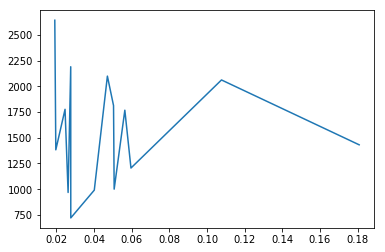

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline 
x = subgroup['AvgDist'].sort_values(ascending=True)
y = subgroup['Price']
plt.plot(x,y)

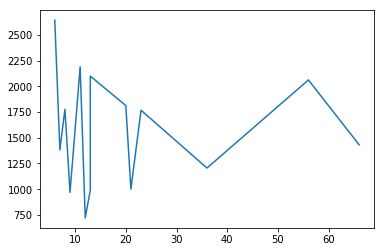

In [197]:
x = subgroup['Appartments'].sort_values(ascending=True)
y = subgroup['Price']
plt.plot(x,y)

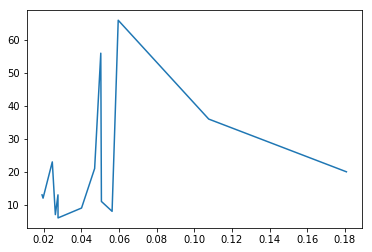

In [198]:
x = subgroup['AvgDist'].sort_values(ascending=True)
y = subgroup['Appartments']
plt.plot(x,y)